1. Import Libraries

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
# Create path
path = '/Users/ianfleming/Desktop/05-2025 Instacart Basket Analysis'

In [18]:
# Import merged dataframe
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'ords_prods_merge.pkl'))

In [19]:
# Check import
df_ords_prods_merge

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,match,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_user,spending_flag,median_days_per_user,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,both,Mid–range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,both,Mid–range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,13,1,12,7.0,False,14197,5,1,...,both,Mid–range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer
32434485,2977660,206209,13,1,12,7.0,False,38730,6,0,...,both,Mid–range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer
32434486,2977660,206209,13,1,12,7.0,False,31477,7,0,...,both,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer
32434487,2977660,206209,13,1,12,7.0,False,6567,8,0,...,both,Low-range product,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer


2. Types of Charts - Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

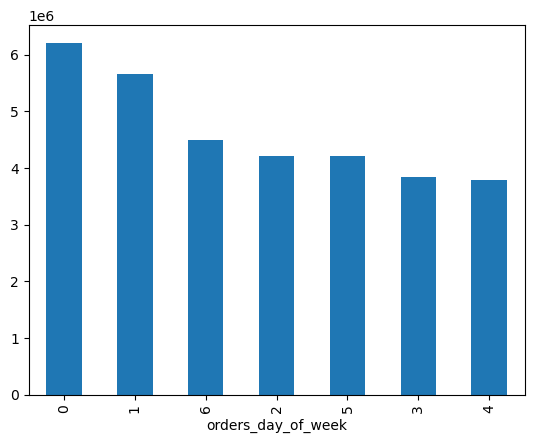

In [20]:
# Create a bar chart
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

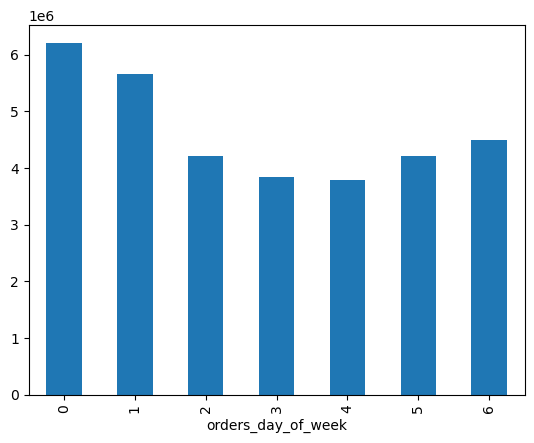

In [22]:
# Sort the coloumns
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

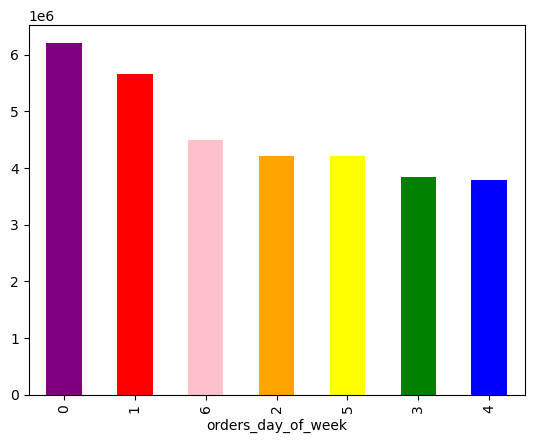

In [24]:
# Change colour of the columns
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [27]:
# Export bar chart into folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

3. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

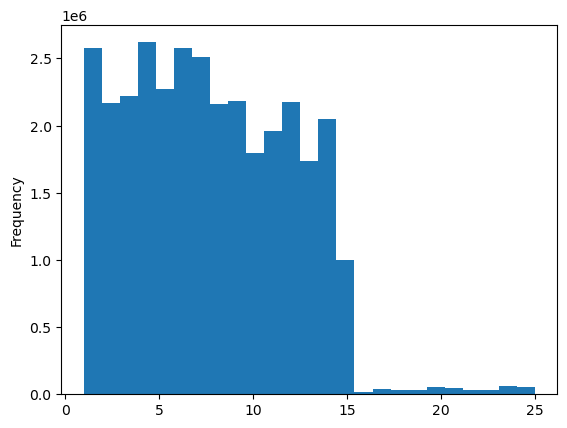

In [28]:
# Create histogram of 'prices' column
df_ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

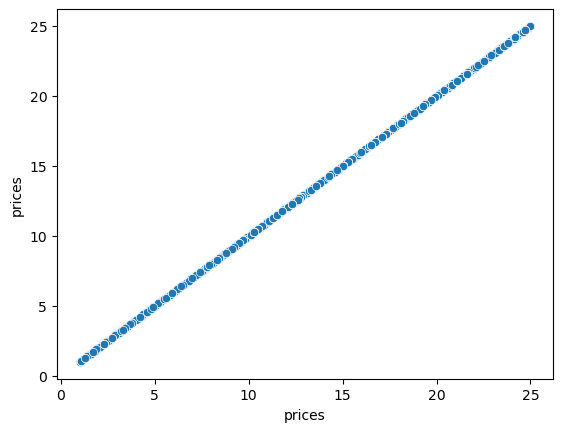

In [30]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [31]:
# Check for prices greater than 100
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,match,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_user,spending_flag,median_days_per_user,order_frequency_flag


I had found these outliers in a previous task so this part of the exercise did not work for me. 

In [32]:
# Check max price
df_ords_prods_merge['prices'].max()

25.0

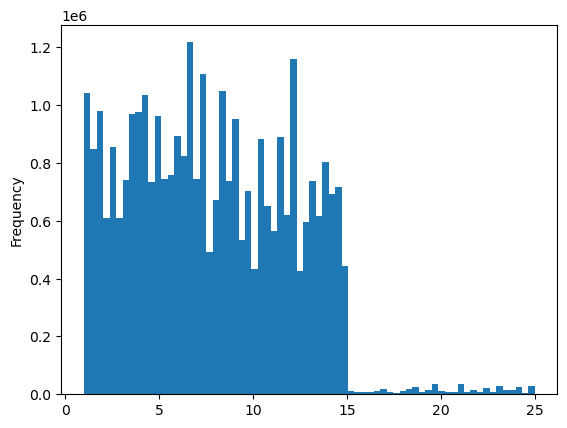

In [35]:
# Create histogram of 'prices' column
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [36]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices.png'))

4. Creating Line Charts

In [40]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [42]:
# Store 70% of the data in the dataframe big
big = df_ords_prods_merge[dev]

In [43]:
# Store 30% of the data in the dataframe small
small = df_ords_prods_merge[~dev]

In [44]:
# Check dataframe size
len(df_ords_prods_merge)

32434489

In [45]:
# Check size of the two new datarames added together
len(big) + len(small)

32434489

In [46]:
# Reduce sample to columns needed 'orders_day_of_week' and 'prices'
df_2 = small[['orders_day_of_week','prices']]

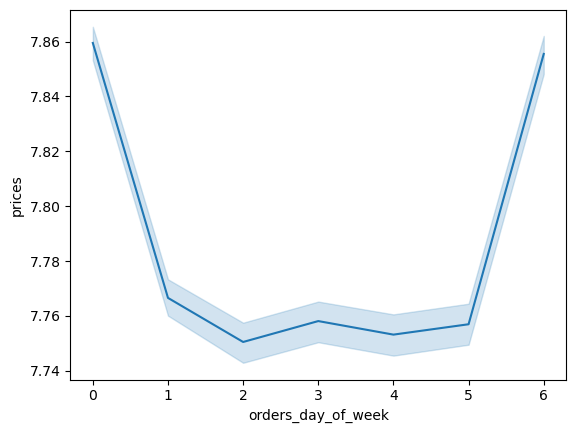

In [47]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [48]:
# Export dataframe
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))